In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv("personality_dataset.csv")
df.sample(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2367,1.0,No,8.0,7.0,No,9.0,5.0,Introvert
1797,6.0,Yes,0.0,1.0,Yes,4.0,1.0,Introvert
560,4.0,Yes,0.0,0.0,Yes,4.0,0.0,Introvert
220,4.0,Yes,2.0,2.0,Yes,NaN,0.0,Introvert
1398,2.0,No,6.0,5.0,No,8.0,7.0,Extrovert
556,7.0,Yes,1.0,1.0,Yes,3.0,0.0,Introvert
1737,3.0,No,9.0,3.0,No,NaN,5.0,Extrovert
717,2.0,No,7.0,6.0,No,6.0,8.0,Extrovert
1755,0.0,No,8.0,5.0,No,5.0,3.0,Extrovert
1705,0.0,No,8.0,4.0,No,14.0,7.0,Extrovert


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [37]:
df.dropna(inplace=True)

In [38]:
df_null = df[df.isnull().any(axis=1)]
print(df_null)

Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []


In [39]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [40]:
features = df[["Stage_fear", "Drained_after_socializing", "Personality"]]

for col in features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [41]:
X = df.drop("Personality", axis=1)
y = df["Personality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# models and parameters
models_params = {
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "model__max_depth": [3, 5, 10, None],
            "model__min_samples_split": [2, 5],
            "model__min_samples_leaf": [1, 2]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "model__n_estimators": [50, 100],
            "model__max_depth": [5, 10, None],
        }
    },
    "SVM": {  
        "model": SVC(),
        "params": {
            "model__kernel": ['linear', 'rbf'],
            "model__C": [1, 10]
        }
    }
}

results = {}

for name, mp in models_params.items():
    print(f"\n🔍 Tuning model: {name}")
    
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(pipe, mp['params'], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    print("Best Params:", grid.best_params_)
    print("Best Accuracy:", grid.best_score_)



🔍 Tuning model: DecisionTree


Best Params: {'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Accuracy: 0.9247830954380072

🔍 Tuning model: RandomForest
Best Params: {'model__max_depth': 5, 'model__n_estimators': 50}
Best Accuracy: 0.9247830954380072

🔍 Tuning model: SVM
Best Params: {'model__C': 1, 'model__kernel': 'linear'}
Best Accuracy: 0.9247830954380072


In [55]:
SVM_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

SVM_pipeline.fit(X_train, y_train)

y_pred = SVM_pipeline.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.9274193548387096
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       246
           1       0.91      0.95      0.93       250

    accuracy                           0.93       496
   macro avg       0.93      0.93      0.93       496
weighted avg       0.93      0.93      0.93       496



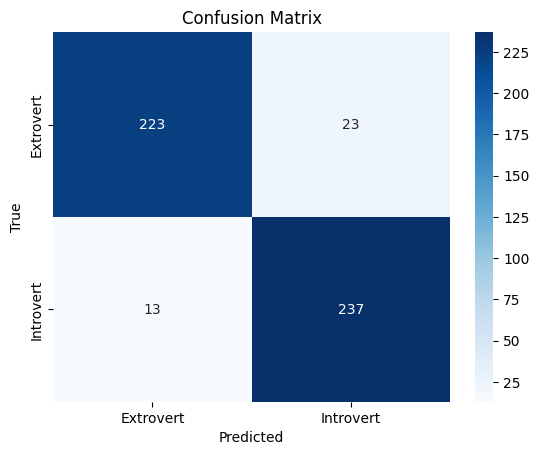

In [44]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

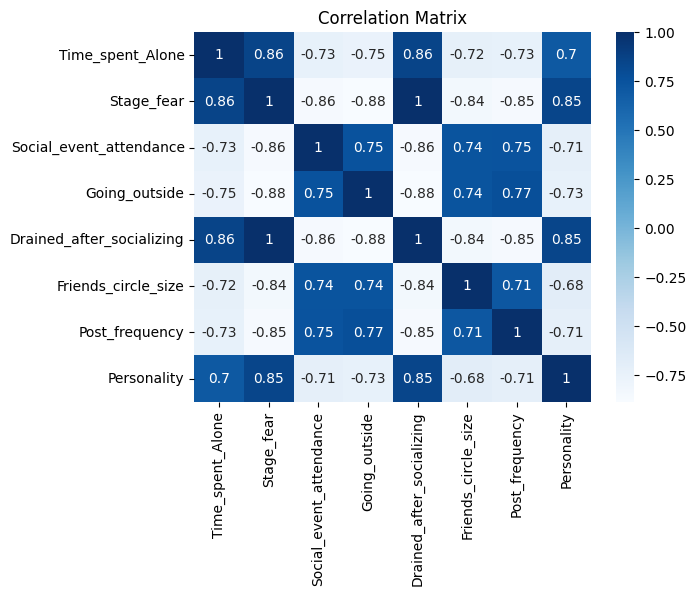

In [49]:
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

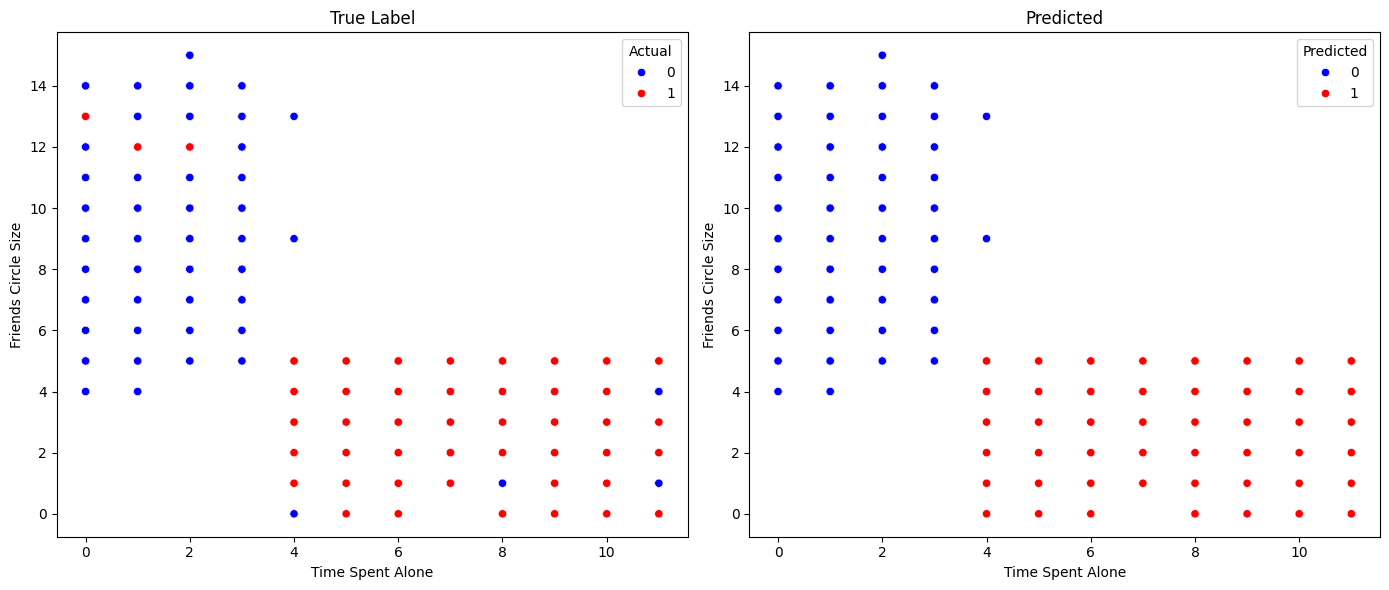

In [53]:
plot_df = pd.DataFrame({
    'Time_spent_Alone': X_test['Time_spent_Alone'],
    'Friends_circle_size': X_test['Friends_circle_size'],
    'Actual': y_test,
    'Predicted': y_pred
})

# True label
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=plot_df,
    x='Time_spent_Alone',
    y='Friends_circle_size',
    hue='Actual',
    palette={0: 'blue', 1: 'red'}
)
plt.title('True Label')
plt.xlabel('Time Spent Alone')
plt.ylabel('Friends Circle Size')

# Predicted
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=plot_df,
    x='Time_spent_Alone',
    y='Friends_circle_size',
    hue='Predicted',
    palette={0: 'blue', 1: 'red'}
)
plt.title('Predicted')
plt.xlabel('Time Spent Alone')
plt.ylabel('Friends Circle Size')

plt.tight_layout()
plt.show()


In [54]:
mean_per_grup = df.groupby('Personality').mean()
mean_per_grup

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
Personality,,,,,,,
0,2.138932,0.085557,5.950549,4.620094,0.085557,9.104396,5.589482
1,7.046550,0.936825,1.808811,1.312552,0.936825,3.206151,1.409809


In [ ]:
def predict_extrovert_or_introvert(input_dict):
    features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
                     'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
    
    # Create a list input according to the feature order and make prediction
    input_list = [input_dict[feature] for feature in features]
    prediction = SVM_pipeline.predict([input_list])[0]
    return 'Extrovert' if prediction == 0 else 'Introvert'

# Input new data
data = {
    'Time_spent_Alone': 8,
    'Stage_fear': 0,
    'Social_event_attendance': 5,
    'Going_outside': 4,
    'Drained_after_socializing': 1,
    'Friends_circle_size': 10,
    'Post_frequency': 3
}

# Predict
result = predict_extrovert_or_introvert(data)
print(f"The Personality is: {result}")

The Personality is: Introvert
